MLPregression(
  (input): Linear(in_features=3, out_features=8, bias=True)
  (hidden2): Linear(in_features=8, out_features=4, bias=True)
  (predict): Linear(in_features=4, out_features=1, bias=True)
)


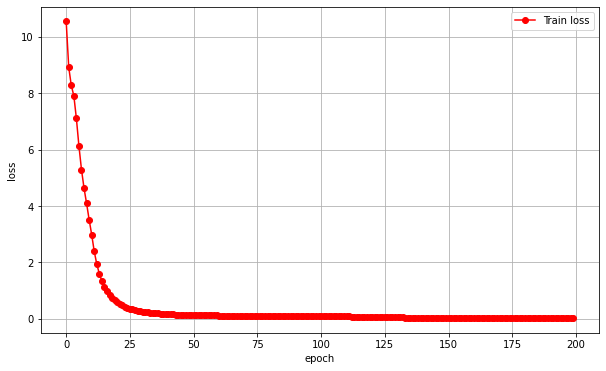

tensor([-0.0902,  3.1506,  2.8142,  ...,  0.8551, -0.0040,  0.0212])
tensor([-2.0745e-04,  3.4300e+00,  2.6800e+00,  ...,  9.5000e-01,
         9.0870e-03, -4.7500e-06], dtype=torch.float64)


In [4]:
import numpy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import torch.utils.data as Data
import matplotlib.pyplot as plt

data=pd.read_excel('C:/Users/XHM/Desktop/data/TFT/vg_train.xlsx',engine='openpyxl')
#data['Vg']=data['Vg'].apply(np.log) 
all_input=data[['Vg','Vd','W/L']].values
all_output=data['gm']
minmax=preprocessing.MinMaxScaler()
#all_output=minmax.fit_transform(data['Idrain'].values.reshape(-1,1))

(x_train,x_test,y_train,y_test)=train_test_split(all_input,all_output,train_size=0.8,
                                                 random_state=0)

#标准化处理

#x_train_s=minmax.fit_transform(x_train)
#x_test_s=minmax.fit_transform(x_test)



#数据类型处理
train_xt=torch.from_numpy(x_train.astype(np.float32))
train_yt=torch.from_numpy(y_train.values)
test_xt=torch.from_numpy(x_test.astype(np.float32))
test_yt=torch.from_numpy(y_test.values)

#将数据处理为数据加载器
train_data=Data.TensorDataset(train_xt,train_yt.float())
test_data=Data.TensorDataset(test_xt,test_yt.float())

train_loader=Data.DataLoader(dataset=train_data,batch_size=64,shuffle=True,num_workers=0)
test_loader=Data.DataLoader(dataset=test_data,batch_size=64,shuffle=True,num_workers=0)


# In[153]:


#搭建MLP回归模型
class MLPregression(nn.Module):
    def __init__(self):
        super(MLPregression,self).__init__()
        self.input=nn.Linear(in_features=3,out_features=28,bias=True)
        #定义第二个隐藏层
        self.hidden2=nn.Linear(28,24)
        #回归预测层
        self.predict=nn.Linear(24,1)
    def forward(self,x):
        x=torch.sigmoid(self.input(x))
        x=torch.sigmoid(self.hidden2(x))
        output=self.predict(x)
        return output[:,0]
mlpreg=MLPregression()

#mlpreg.load_state_dict(torch.load('C:/Users/XHM/LEVIST/DIST/TFT_init.pth'))

print(mlpreg)

#定义优化器
optimizer=torch.optim.Adam(mlpreg.parameters(),lr=0.004)
loss_func=nn.MSELoss()
train_loss_all=[]
for epoch in range(200):
    train_loss=0
    train_num=0
    for step,(b_x,b_y) in enumerate(train_loader):
        output=mlpreg(b_x)
        loss=loss_func(output,b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()*b_x.size(0)
        #print(output)
        #print(test_yt)
        train_num+=b_x.size(0)
    train_loss_all.append(train_loss/train_num)

plt.figure(figsize=(10,6))
plt.plot(train_loss_all,"ro-",label="Train loss")
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

#预测

pre_y=mlpreg(test_xt)
print(pre_y.data)
print(test_yt)


#torch.save(mlpreg,'C:/Users/XHM/Desktop/MLP/mlp_model.pth')


#pre_y=mm.inverse_transform(pre_y.data.reshape(-1,1))
#print(pre_y)


In [11]:
mlpreg.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data in test_loader:
        test_xt,test_yt=data
        predicted=mlpreg(test_xt)
        total += test_yt.size(0)
        correct += (test_yt/predicted).sum().item()
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))


Accuracy of the model on the test images: 70.91310370681633 %


In [7]:
datapre=pd.read_excel('C:/Users/XHM/Desktop/data/Vg_pre.xlsx',engine='openpyxl')
x_1=datapre[['Vg','Vd','W/L']].values

#标准化处理

#数据类型处理
train_1=torch.from_numpy(x_1.astype(np.float32))
pre=mlpreg(train_1)

pre=pre.detach().numpy()
inputframe = pd.DataFrame(x_1,columns=['Vg','Vd','W/L'])    #预测的输入
yframe=pd.DataFrame({'gm':pre})    #预测的y

#inputframe.to_csv('C:/Users/XHM/Desktop/data/pre_Vg.csv',index=False,sep=',')
#yframe.to_csv(r'C:/Users/XHM/Desktop/data/pre_Vg.csv',mode='a',sep=',')
yframe.to_csv('C:/Users/XHM/Desktop/data/pre_vdgm1.csv',index=False,sep=',')


In [ ]:
import pandas
import numpy
import time
import os
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import kFold,cross_validate


import bayes_opt
from bayes_opt import BayesianOptimization
import hyperopt
from hyperopt import hp,fmin,tpe,Trials,partial
from hyperopt.early_stop import no_progress_loss
import optuna


In [ ]:
def objective():       #不允许传入字典，只能传参数
    #评估器
    reg=RFR(#参数)
    
    #交叉验证
    cv=kFold(...)
    result=cross_validate(reg,x,y,cv)
    
    #交叉验证的结果
    loss=result['test_rmse']
    
    return loss

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import torch.utils.data as Data
import matplotlib.pyplot as plt

data=pd.read_excel('C:/Users/XHM/Desktop/data/TFT/TFT_train.xlsx',engine='openpyxl')
all_input=data[['Vdrain','Vgate','W/L']].values
all_output=data['Idrain']
minmax=preprocessing.MinMaxScaler()
#all_output=minmax.fit_transform(data['Idrain'].values.reshape(-1,1))

(x_train,x_test,y_train,y_test)=train_test_split(all_input,all_output,train_size=1,
                                                 random_state=0)

#标准化处理

#x_train_s=minmax.fit_transform(x_train)
#x_test_s=minmax.fit_transform(x_test)



#数据类型处理
train_xt=torch.from_numpy(x_train.astype(np.float32))
train_yt=torch.from_numpy(y_train.values)
test_xt=torch.from_numpy(x_test.astype(np.float32))
test_yt=torch.from_numpy(y_test.values)
#将数据处理为数据加载器
train_data=Data.TensorDataset(train_xt,train_yt.float())
test_data=Data.TensorDataset(test_xt,test_yt.float())

train_loader=Data.DataLoader(dataset=train_data,batch_size=64,shuffle=True,num_workers=0)


# 步骤一：构造黑盒目标函数
def rf_cv(n_estimators, min_samples_split, max_features, max_depth):
    val = cross_val_score(
        RandomForestClassifier(n_estimators=int(n_estimators),
                               min_samples_split=int(min_samples_split),
                               max_features=min(max_features, 0.999),  # float
                               max_depth=int(max_depth),
                               random_state=2),
        train_xt,train_yt, scoring='f1', cv=5
    ).mean()
    return val


# 步骤二：确定取值空间
pbounds = {'n_estimators': (10, 250),  # 表示取值范围为10至250
           'min_samples_split': (2, 25),
           'max_features': (0.1, 0.999),
           'max_depth': (5, 15)}

# 步骤三：构造贝叶斯优化器
optimizer = BayesianOptimization(
    f=rf_cv,  # 黑盒目标函数
    pbounds=pbounds,  # 取值空间
    verbose=2,  # verbose = 2 时打印全部，verbose = 1 时打印运行中发现的最大值，verbose = 0 将什么都不打印
    random_state=1,
)
optimizer.maximize(  # 运行
    init_points=5,  # 随机搜索的步数
    n_iter=25,  # 执行贝叶斯优化迭代次数
)
print(optimizer.res)  # 打印所有优化的结果
print(optimizer.max)  # 最好的结果与对应的参数

In [7]:
import numpy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import torch.utils.data as Data
import matplotlib.pyplot as plt

data=pd.read_excel('C:/Users/XHM/Desktop/data/TFT/TFT_train.xlsx',engine='openpyxl')
all_input=data[['Vdrain','Vgate','W/L']].values
all_output=data['Idrain']
minmax=preprocessing.MinMaxScaler()
#all_output=minmax.fit_transform(data['Idrain'].values.reshape(-1,1))

(x_train,x_test,y_train,y_test)=train_test_split(all_input,all_output,train_size=1,
                                                 random_state=0)

#标准化处理

#x_train_s=minmax.fit_transform(x_train)
#x_test_s=minmax.fit_transform(x_test)



#数据类型处理
train_xt=torch.from_numpy(x_train.astype(np.float32))
train_yt=torch.from_numpy(y_train.values)
test_xt=torch.from_numpy(x_test.astype(np.float32))
test_yt=torch.from_numpy(y_test.values)
#将数据处理为数据加载器
train_data=Data.TensorDataset(train_xt,train_yt.float())
test_data=Data.TensorDataset(test_xt,test_yt.float())

train_loader=Data.DataLoader(dataset=train_data,batch_size=64,shuffle=True,num_workers=0)


In [12]:
from lazypredict.Supervised import LazyRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(x_train, x_test, y_train,y_test)

print(models)

 43%|███████████████████████████████████▏                                              | 18/42 [00:00<00:00, 80.53it/s]

ElasticNetCV model failed to execute
Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=1.
KNeighborsRegressor model failed to execute
Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 5
LarsCV model failed to execute
Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=1.


 64%|████████████████████████████████████████████████████▋                             | 27/42 [00:00<00:00, 78.00it/s]

LassoCV model failed to execute
Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=1.
LassoLarsCV model failed to execute
Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=1.
OrthogonalMatchingPursuitCV model failed to execute
Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=1.
RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 1.


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 79.01it/s]


LGBMRegressor model failed to execute
Found array with 1 sample(s) (shape=(1, 3)) while a minimum of 2 is required.
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HuberRegressor                              -0.04      -0.04 75.56        0.02
AdaBoostRegressor                           -0.04      -0.04 75.56        0.01
Lasso                                       -0.04      -0.04 75.56        0.01
TweedieRegressor                            -0.04      -0.04 75.56        0.01
TransformedTargetRegressor                  -0.04      -0.04 75.56        0.01
SVR                                         -0.04      -0.04 75.56        0.01
RidgeCV                                     -0.04      -0.04 75.56        0.01
Ridge                                       -0.04      -0.04 75.56        0.01
RandomForestRegressor                       -0.04      -0.04 75.56        0.09
PoissonRegresso